In [1]:
from src.data import *
from src.embeddings import *
from src.ph import *
from src.orcml import *
from src.plotting import *
from src.eval_utils import *
%load_ext autoreload

n_points = 750

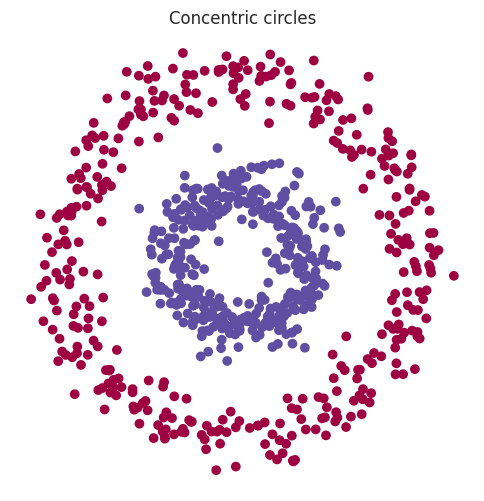

In [35]:
# noiseless
%autoreload 2
return_dict = concentric_circles(n_points=n_points, factor=0.375, noise=0.09, supersample=True, supersample_factor=1)
circles, cluster, circles_supersample, subsample_indices = return_dict['data'], return_dict['cluster'], return_dict['data_supersample'], return_dict['subsample_indices']
color = cluster.copy()
plot_data_2D(circles, color, 'Concentric circles')

/home/tristan/envs/orcml/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/home/tristan/envs/orcml/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


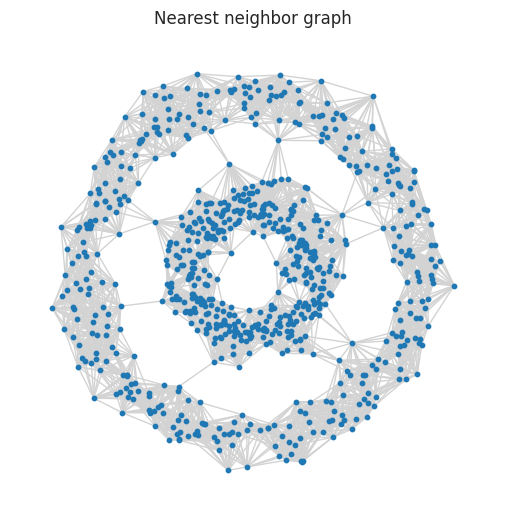

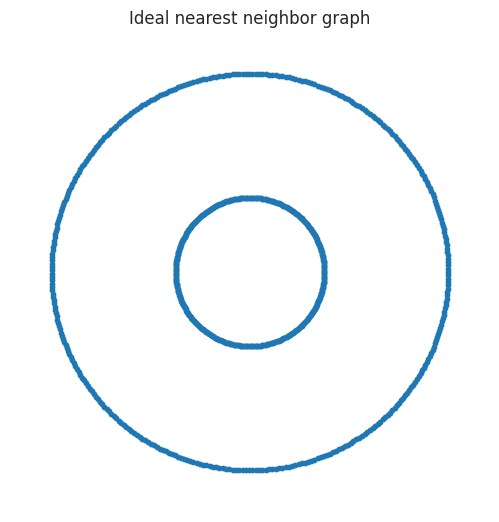

In [36]:
%autoreload 2
n_neighbors = 20
G, A = make_prox_graph(circles, mode='nbrs', n_neighbors=n_neighbors)
plot_graph_2D(circles, G, 'Nearest neighbor graph')

G_ideal, A_ideal = make_prox_graph(circles_supersample, mode='nbrs', n_neighbors=n_neighbors)
plot_graph_2D(circles_supersample, G_ideal, 'Ideal nearest neighbor graph')

/home/tristan/envs/orcml/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning: There are 901 intervals given as input, whereas max_intervals is set to 100.
  warnings.warn(
/home/tristan/envs/orcml/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning: There are 752 intervals given as input, whereas max_intervals is set to 100.
  warnings.warn(


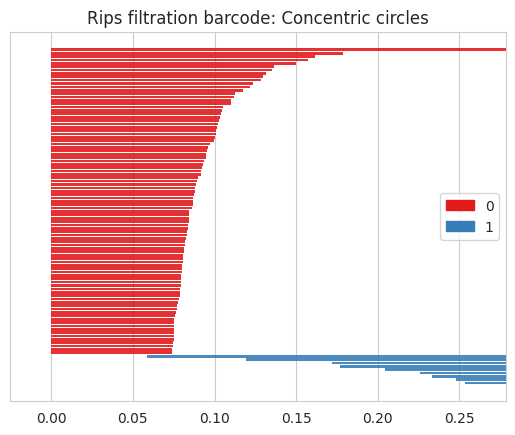

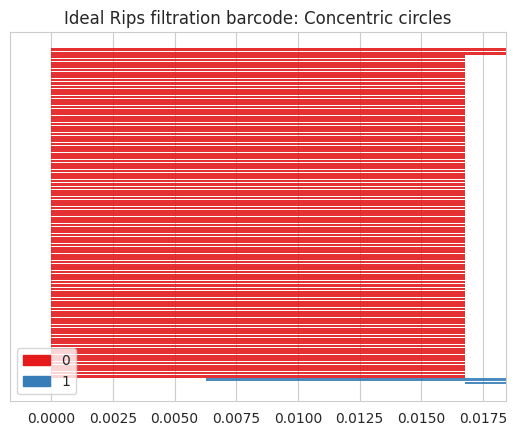

In [37]:
dgms = rips_ph(A, maxdim=1)
plot_barcode(dgms, 'Rips filtration barcode: Concentric circles')

dgms_ideal = rips_ph(A_ideal, maxdim=1)
plot_barcode(dgms_ideal, 'Ideal Rips filtration barcode: Concentric circles')

966 of 8702 total edges were removed.
30 of 966 removed edges were bad edges.
30 of 30 total bad edges were removed.


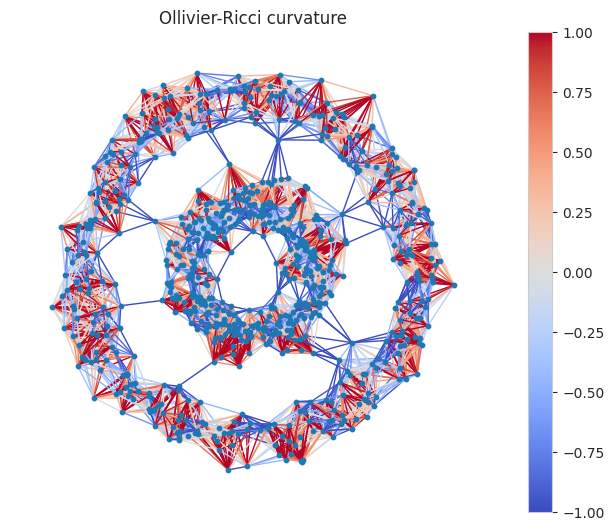

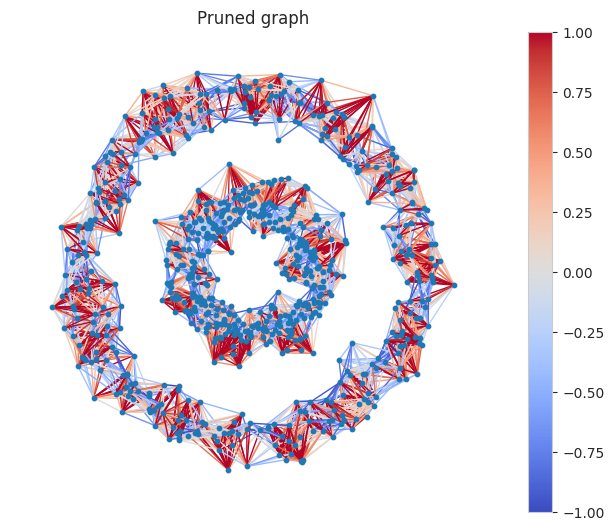

In [38]:
%autoreload 2
return_dict = graph_orc(G, weight='weight')
G_orc = return_dict['G']
scaled_orcs = return_dict['scaled_orcs']
wasserstein_distances = return_dict['wasserstein_distances']
plot_graph_2D(circles, G_orc, 'Ollivier-Ricci curvature', edge_color=scaled_orcs, colorbar=True)

threshold = -1
pruned = prune(G_orc, threshold, circles, cluster=cluster)
plot_graph_2D(circles, pruned['G_pruned'], 'Pruned graph', edge_color=pruned['preserved_scaled_orcs'], colorbar=True)

/home/tristan/envs/orcml/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning: There are 1147 intervals given as input, whereas max_intervals is set to 100.
  warnings.warn(


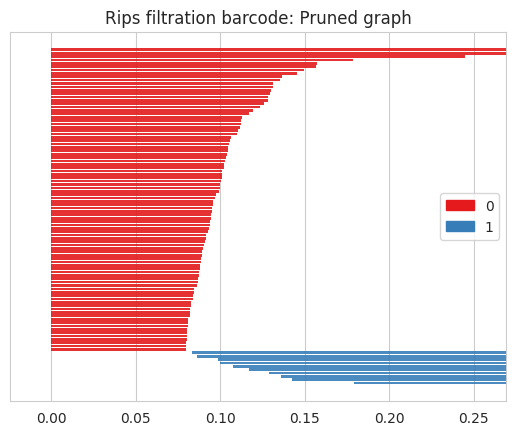

In [39]:
A_pruned = pruned['A_pruned']
dgms_pruned = rips_ph(A_pruned, maxdim=1)
plot_barcode(dgms_pruned, 'Rips filtration barcode: Pruned graph')

In [2]:
%autoreload 2
r = 1.5
R = 5
return_dict = torus(n_points = 750, noise=0.3, r=r, R=R, double=True, supersample=True, supersample_factor=1)
torus_double_points, color, cluster, torus_double_supersample, subsample_indices = return_dict['data'], return_dict['color'], return_dict['cluster'], return_dict['data_supersample'], return_dict['subsample_indices']
# plot data
plot_data_3D(torus_double_points, color, 'Double Torus')

In [4]:
# get graph
n_neighbors = 10
G, A = make_prox_graph(torus_double_points, mode='nbrs', n_neighbors=n_neighbors)
# print number of connected components of A
print('Number of connected components of A: ', nx.number_connected_components(nx.from_numpy_array(A)))
plot_graph_3D(torus_double_points, G, 'Nearest neighbor graph', node_color=color)

G_ideal, A_ideal = make_prox_graph(torus_double_supersample, mode='nbrs', n_neighbors=n_neighbors)
# print number of connected components of A_ideal
print('Number of connected components of A_ideal: ', nx.number_connected_components(nx.from_numpy_array(A_ideal)))
plot_graph_3D(torus_double_supersample, G_ideal, 'Ideal nearest neighbor graph')

Number of connected components of A:  1


Number of connected components of A_ideal:  2


usetex mode requires dvipng.
/home/tristan/envs/orcml/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning:

There are 1033 intervals given as input, whereas max_intervals is set to 100.

/home/tristan/envs/orcml/lib/python3.8/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning:

There are 957 intervals given as input, whereas max_intervals is set to 100.



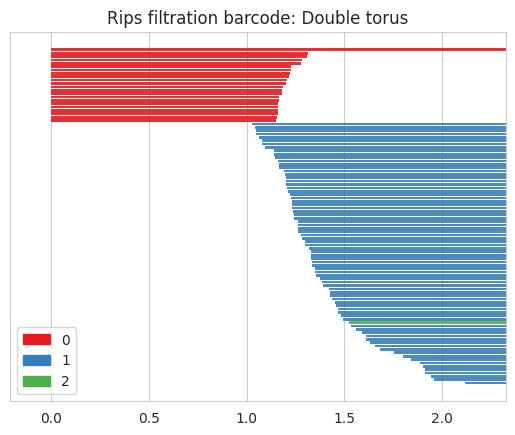

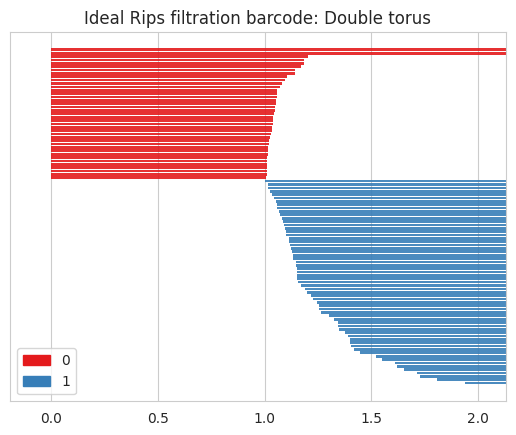

In [5]:
# get persistence diagram
dgms = rips_ph(A, maxdim=2)
plot_barcode(dgms, 'Rips filtration barcode: Double torus')

dgms_ideal = rips_ph(A_ideal, maxdim=2)
plot_barcode(dgms_ideal, 'Ideal Rips filtration barcode: Double torus')

In [10]:
return_dict = graph_orc(G, weight='weight')
G_orc = return_dict['G']
scaled_orcs = return_dict['scaled_orcs']
wasserstein_distances = return_dict['wasserstein_distances']
plot_graph_3D(torus_double_points, G_orc, 'Ollivier-Ricci curvature', edge_color=scaled_orcs, colorbar=True)

# prune
threshold = -1
pruned = prune(G_orc, threshold, torus_double_points, cluster=cluster)
plot_graph_3D(torus_double_points, pruned['G_pruned'], 'Pruned graph', edge_color=pruned['preserved_scaled_orcs'], colorbar=True)


661 of 4331 total edges were removed.
50 of 661 removed edges were bad edges.
50 of 61 total bad edges were removed.
